In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 =pd.read_csv("titanic_dataset (1) week 15 lark.csv")
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#setting passenger id as index column
data =data1.set_index("PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

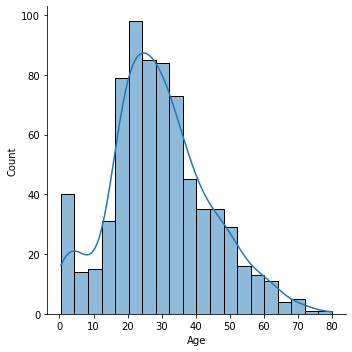

In [8]:
#filling the missing values
sns.displot(data['Age'],kde=True)

In [9]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [10]:
data['Age'].isna().sum() # null values are replaced

0

In [11]:
data['Cabin'] = data['Cabin'].fillna('Unknown')

In [12]:
data['Cabin'].isna().sum() # null values are replaced

0

In [13]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

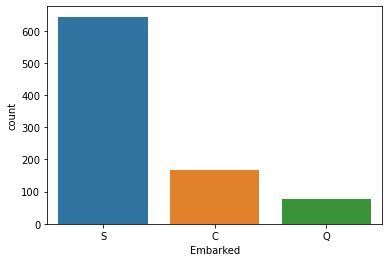

In [14]:
sns.countplot(x='Embarked',data=data)

In [15]:
data['Embarked'] = data['Embarked'].fillna('S')

In [16]:
data['Embarked'].isna().sum() #Null values are filled

0

In [17]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

null values are filled

<AxesSubplot:xlabel='Age'>

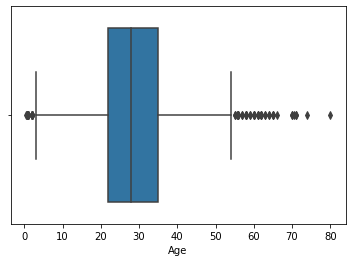

In [19]:
sns.boxplot(x='Age',data=data)

In [20]:
q1,q2,q3 = np.percentile(data['Age'],[25,50,75])
q1,q2,q3

(22.0, 28.0, 35.0)

In [21]:
IQR = q3-q1
IQR

13.0

In [22]:
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)

lower =  2.5
upper =  54.5


In [23]:
outlier = []
for i in data['Age']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

values in age may be genuine.so we keep it as it is

Text(0.5, 1.0, 'Box plot of Fare')

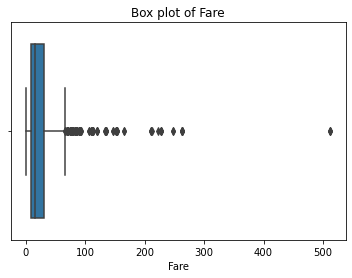

In [24]:
sns.boxplot(x='Fare',data=data)
plt.title('Box plot of Fare')

In [25]:
q1,q2,q3 = np.percentile(data['Fare'],[25,50,75])
q1,q2,q3

(7.9104, 14.4542, 31.0)

In [26]:
IQR = q3-q1
IQR

23.0896

In [27]:
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)

lower =  -26.724
upper =  65.6344


In [28]:
outlier = []
for i in data['Fare']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)

In [29]:
data['Fare'] = np.where(data['Fare']>upper_limit ,upper_limit,data['Fare'] )

<AxesSubplot:xlabel='Fare'>

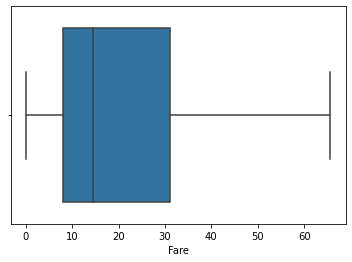

In [30]:
sns.boxplot(x='Fare',data=data)

In [31]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:xlabel='SibSp'>

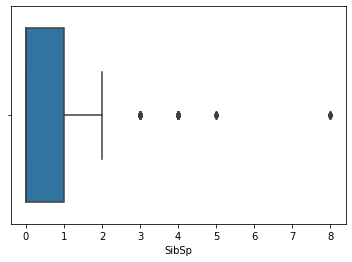

In [32]:
sns.boxplot(x="SibSp",data=data)

<Figure size 1440x360 with 0 Axes>

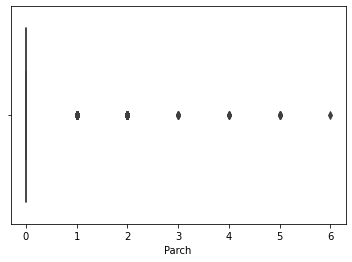

<Figure size 1440x360 with 0 Axes>

In [33]:
sns.boxplot(x="Parch",data=data)
plt.figure(figsize=(20,5))


outliers in sibsp and parch can keep as it is

In [34]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

name,ticket,cabin has unique values so we can drop that columns

In [35]:
data=data.drop(['Name','Cabin','Ticket'],axis=1)


In [36]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,65.6344,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [37]:
data=pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,65.6344,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
# Splitting data
x=data.drop('Survived',axis=1)
y=data['Survived']

In [39]:
#scaleing
from sklearn import preprocessing
minmax= preprocessing.MinMaxScaler()
x=minmax.fit_transform(x)
x=pd.DataFrame(x,columns=['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S'])
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.271174,0.125,0.0,0.110460,1.0,0.0,1.0
1,0.0,0.472229,0.125,0.0,1.000000,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.0,0.120745,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.0,0.809027,0.0,0.0,1.0
4,1.0,0.434531,0.000,0.0,0.122649,1.0,0.0,1.0


<AxesSubplot:>

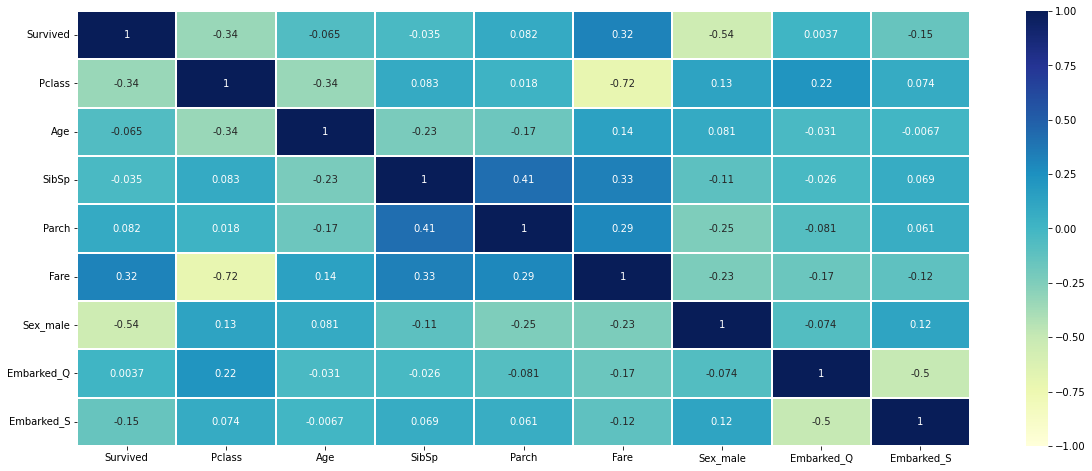

In [40]:
#plotting heatmap
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

In [41]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [42]:
# Model training
# Randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [43]:
# Evaluate the performance
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [44]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  0.7728813559322034
Recall Score is :  0.7728813559322034
Precision Score is :  0.7728813559322034
F1 score is :  0.7728813559322033


In [45]:
confusion_matrix(y_test,y_pred)

array([[142,  33],
       [ 34,  86]], dtype=int64)

In [46]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
logit_model= LogisticRegression(random_state =42)
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [47]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  0.8101694915254237
Recall Score is :  0.8101694915254237
Precision Score is :  0.8101694915254237
F1 score is :  0.8101694915254237


In [48]:
confusion_matrix(y_test,y_pred)

array([[154,  21],
       [ 35,  85]], dtype=int64)

In [49]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# To obtain optimum k values 
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    acc_values

Text(0, 0.5, 'accuracy')

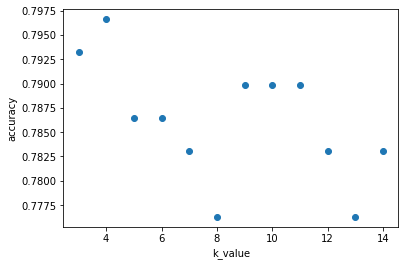

In [51]:
plt.plot(neighbors,acc_values,'o')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [52]:
classifier =KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [53]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  0.7966101694915254
Recall Score is :  0.7966101694915254
Precision Score is :  0.7966101694915254
F1 score is :  0.7966101694915254


In [54]:
confusion_matrix(y_test,y_pred)

array([[159,  16],
       [ 44,  76]], dtype=int64)

In [55]:
# SVM model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state = 0)
classifier.fit(x_train,y_train)
y_pred_svc = classifier.predict(x_test)

In [56]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  0.7966101694915254
Recall Score is :  0.7966101694915254
Precision Score is :  0.7966101694915254
F1 score is :  0.7966101694915254


In [57]:
confusion_matrix(y_test,y_pred)

array([[159,  16],
       [ 44,  76]], dtype=int64)

In [58]:
#NB Classifier
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)

In [59]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  0.7830508474576271
Recall Score is :  0.7830508474576271
Precision Score is :  0.7830508474576271
F1 score is :  0.7830508474576271


In [60]:
confusion_matrix(y_test,y_pred)

array([[145,  30],
       [ 34,  86]], dtype=int64)

high accuracy is for logistic regression 0.81